In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df_train=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\BigMart_Sales\Train_BigMartSales.csv")
df_test=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\BigMart_Sales\Test_BigMartSales.csv")

In [3]:
df_train.shape

(8523, 12)

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

### Handling missing numerical values

In [10]:
mean_item_weight1=df_train['Item_Weight'].mean()
mean_item_weight2=df_test['Item_Weight'].mean()

In [11]:
print(mean_item_weight1,mean_item_weight2)

12.857645184136183 12.695633368756374


In [12]:
df_train['Item_Weight'].fillna(mean_item_weight1,inplace=True)
df_test['Item_Weight'].fillna(mean_item_weight2,inplace=True)

In [13]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Handling missing categorical values

In [15]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
mode_per_train = df_train.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0])

In [17]:
mode_per_test=df_test.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0])

In [18]:
print(mode_per_train)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object


In [19]:
print(mode_per_test)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object


In [20]:
def fill_outlet_size(row):
    if pd.notna(row['Outlet_Size']):  
        return row['Outlet_Size']
    else:  
        return mode_per_train.get(row['Outlet_Type'])

df_train['Outlet_Size'] = df_train.apply(fill_outlet_size, axis=1)
df_test['Outlet_Size'] = df_test.apply(fill_outlet_size, axis=1)

In [21]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [23]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [25]:
#Dropping few features

In [26]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [27]:
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

### Exploratory Data Analysis

In [28]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
import seaborn as sns
sns.set()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


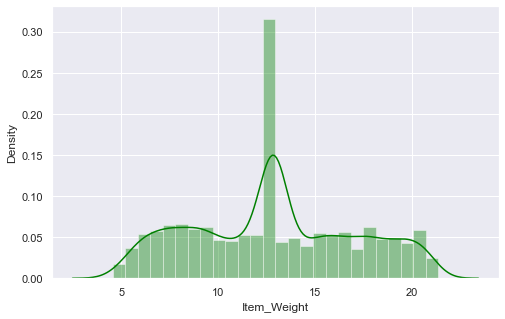

In [30]:
#Item weight distribution
plt.figure(figsize=(8,5))
sns.distplot(df_train['Item_Weight'],color='green')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


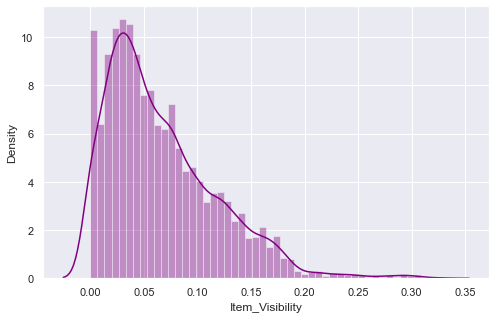

In [31]:
#Item visibility DIstribution
plt.figure(figsize=(8,5))
sns.distplot(df_train['Item_Visibility'],color='purple')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


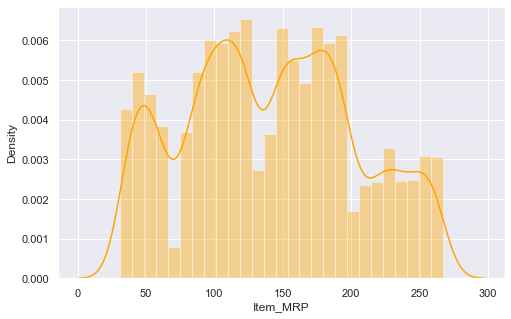

In [32]:
#Item MRP distribution
plt.figure(figsize=(8,5))
sns.distplot(df_train['Item_MRP'],color='orange')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


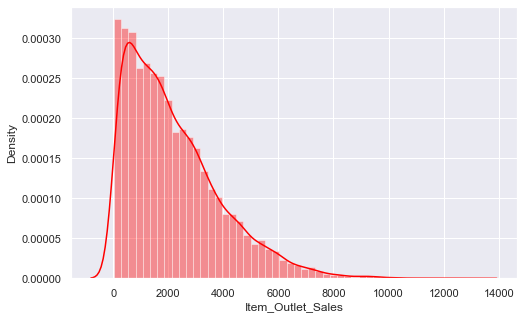

In [33]:
#Item_Sales Distribution
plt.figure(figsize=(8,5))
sns.distplot(df_train['Item_Outlet_Sales'],color='red')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


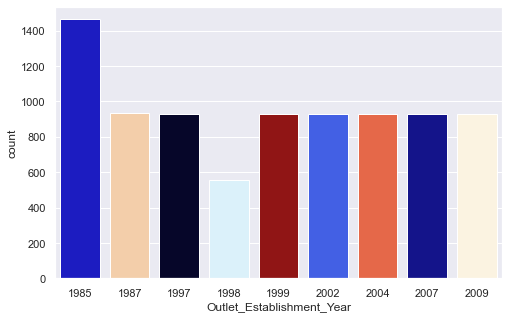

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(df_train['Outlet_Establishment_Year'],palette='flag')
plt.show()   #TBH

### Categorical Features

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


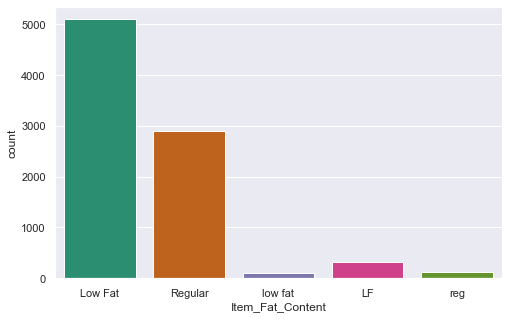

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(df_train['Item_Fat_Content'],palette='Dark2')
plt.xlabel('Item_Fat_Content')
plt.show()

In [36]:
#Here we identify that there are three duplicate columns low fat,LF,reg

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


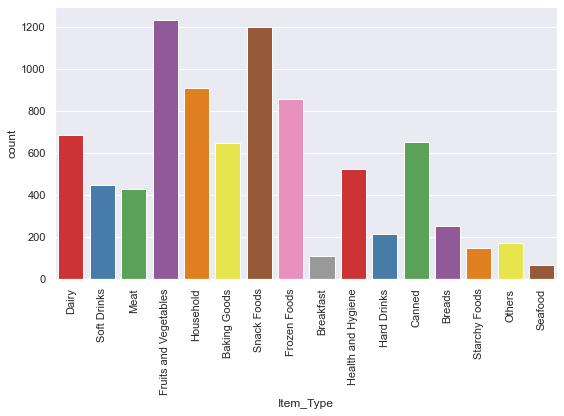

In [37]:
plt.figure(figsize=(9,5))
plt.xticks(rotation=90)
sns.countplot(df_train['Item_Type'],palette='Set1')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


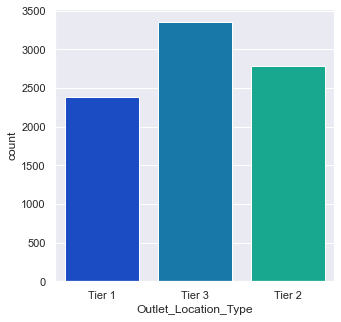

In [38]:
#Outlet location type
plt.figure(figsize=(5,5))
#plt.xticks(rotation=90)
sns.countplot(df_train['Outlet_Location_Type'],palette='winter')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


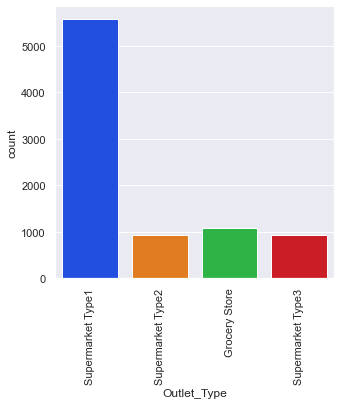

In [39]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(df_train['Outlet_Type'],palette='bright')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


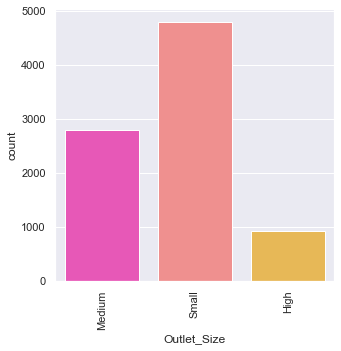

In [40]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(df_train['Outlet_Size'],palette='spring')
plt.show()

In [41]:
df_train['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df_train['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df_train['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [42]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Bivariate_Analysis

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

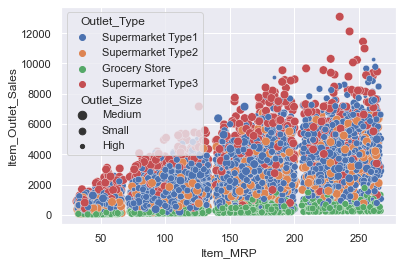

In [44]:
sns.scatterplot(df_train['Item_MRP'],df_train['Item_Outlet_Sales'],hue=df_train['Outlet_Type'],size=df_train['Outlet_Size'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_MRP'>

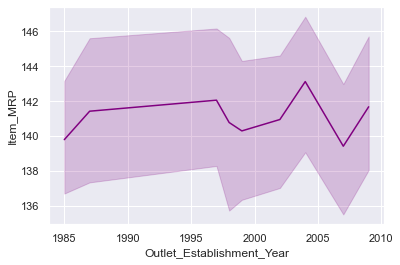

In [45]:
sns.lineplot(df_train['Outlet_Establishment_Year'],df_train['Item_MRP'],color='purple')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

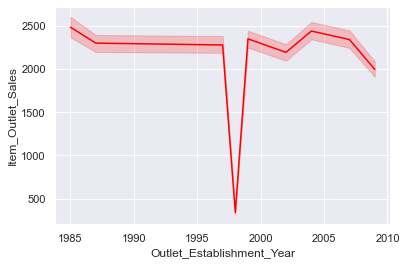

In [46]:
sns.lineplot(df_train['Outlet_Establishment_Year'],df_train['Item_Outlet_Sales'],color='red')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

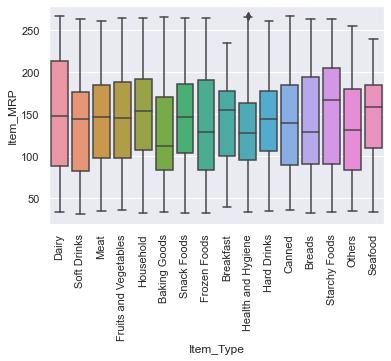

In [47]:
sns.boxplot(df_train['Item_Type'],df_train['Item_MRP'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Outlet_Size'>

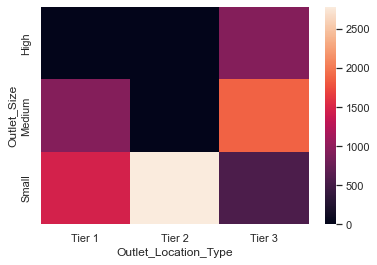

In [48]:
sns.heatmap(pd.crosstab(df_train['Outlet_Size'],df_train['Outlet_Location_Type']))

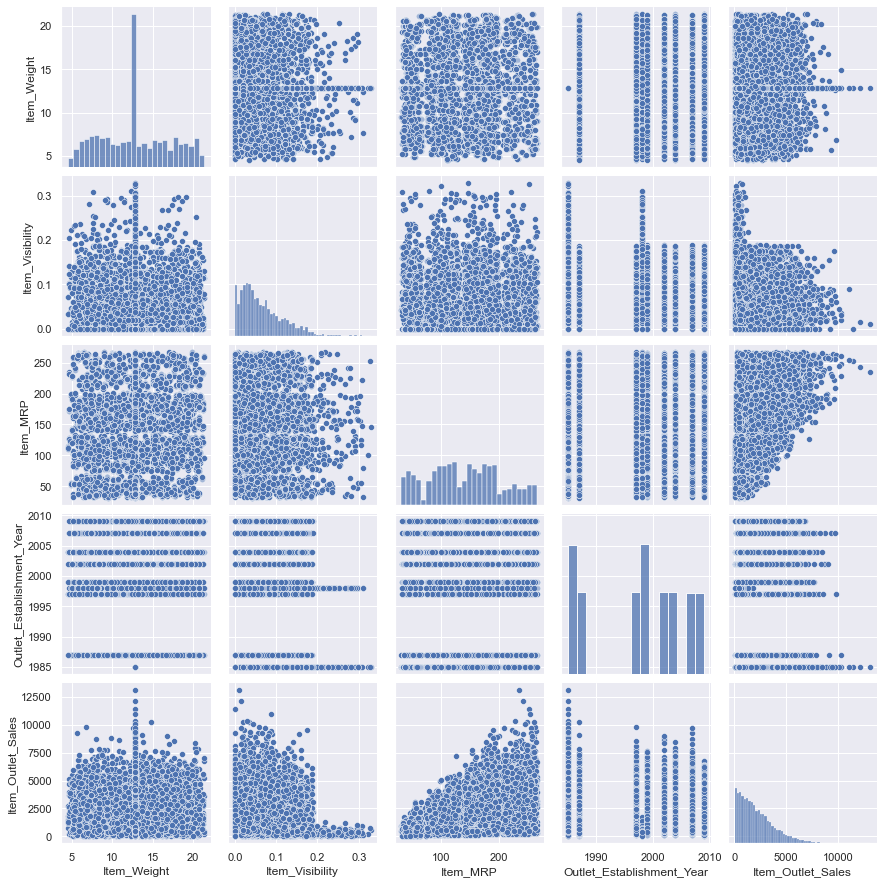

In [49]:
sns.pairplot(df_train)

### Splitting the dataset into train and test

In [50]:
x=df_train.drop('Item_Outlet_Sales',axis=1)

In [51]:
y=df_train['Item_Outlet_Sales']

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [53]:
print(x.shape,xtrain.shape,xtest.shape)

(8523, 9) (6818, 9) (1705, 9)


### Feature Transformation - Handling Categorical Data using Ordinal Encoding,One Hot Encoding

In [54]:
xtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,9.500,Regular,0.035206,Fruits and Vegetables,171.3448,1999,Medium,Tier 1,Supermarket Type1
7757,18.000,Low Fat,0.047473,Household,170.5422,2002,Small,Tier 2,Supermarket Type1
764,17.600,Regular,0.076122,Meat,111.7202,1997,Small,Tier 1,Supermarket Type1
6867,8.325,Low Fat,0.029845,Fruits and Vegetables,41.6138,2002,Small,Tier 2,Supermarket Type1
2716,12.850,Low Fat,0.137228,Snack Foods,155.5630,1997,Small,Tier 1,Supermarket Type1


In [55]:
from sklearn.preprocessing import OrdinalEncoder

In [56]:
oe = OrdinalEncoder(categories=[['Low Fat','Regular']])
xtrain['Item_Fat_Content']= oe.fit_transform(xtrain[['Item_Fat_Content']])

# also the test data
xtest['Item_Fat_Content']= oe.transform(xtest[['Item_Fat_Content']])

In [57]:
oe1 = OrdinalEncoder(categories=[['Small','Medium','High']])
xtrain['Outlet_Size']= oe1.fit_transform(xtrain[['Outlet_Size']])

# also the test data
xtest['Outlet_Size']= oe1.transform(xtest[['Outlet_Size']])

In [58]:
oe2 = OrdinalEncoder(categories=[['Tier 1','Tier 2','Tier 3']])
xtrain['Outlet_Location_Type']= oe2.fit_transform(xtrain[['Outlet_Location_Type']])

# also the test data
xtest['Outlet_Location_Type']= oe2.transform(xtest[['Outlet_Location_Type']])

In [59]:
xtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,9.500,1.0,0.035206,Fruits and Vegetables,171.3448,1999,1.0,0.0,Supermarket Type1
7757,18.000,0.0,0.047473,Household,170.5422,2002,0.0,1.0,Supermarket Type1
764,17.600,1.0,0.076122,Meat,111.7202,1997,0.0,0.0,Supermarket Type1
6867,8.325,0.0,0.029845,Fruits and Vegetables,41.6138,2002,0.0,1.0,Supermarket Type1
2716,12.850,0.0,0.137228,Snack Foods,155.5630,1997,0.0,0.0,Supermarket Type1


### OneHotEncoding

In [60]:
encoded_data1= pd.get_dummies(xtrain['Item_Type'],columns=xtrain['Item_Type'])
encoded_data2= pd.get_dummies(xtrain['Outlet_Type'],columns=xtrain['Outlet_Type'])
print(encoded_data2)

      Grocery Store  Supermarket Type1  Supermarket Type2  Supermarket Type3
549               0                  1                  0                  0
7757              0                  1                  0                  0
764               0                  1                  0                  0
6867              0                  1                  0                  0
2716              0                  1                  0                  0
...             ...                ...                ...                ...
5734              1                  0                  0                  0
5191              0                  1                  0                  0
5390              0                  1                  0                  0
860               0                  1                  0                  0
7270              0                  1                  0                  0

[6818 rows x 4 columns]


In [61]:
encoded_data3= pd.get_dummies(xtest['Item_Type'],columns=xtest['Item_Type'])
encoded_data4= pd.get_dummies(xtest['Outlet_Type'],columns=xtest['Outlet_Type'])
print(encoded_data2)

      Grocery Store  Supermarket Type1  Supermarket Type2  Supermarket Type3
549               0                  1                  0                  0
7757              0                  1                  0                  0
764               0                  1                  0                  0
6867              0                  1                  0                  0
2716              0                  1                  0                  0
...             ...                ...                ...                ...
5734              1                  0                  0                  0
5191              0                  1                  0                  0
5390              0                  1                  0                  0
860               0                  1                  0                  0
7270              0                  1                  0                  0

[6818 rows x 4 columns]


In [62]:
xtrain=pd.concat([xtrain,encoded_data1,encoded_data2], axis=1, ignore_index=False)

In [63]:
xtest=pd.concat([xtest,encoded_data3,encoded_data4], axis=1, ignore_index=False)

In [64]:
cols=['Item_Type','Outlet_Type']
xtrain.drop(cols,axis=1,inplace=True)

In [65]:
xtest.drop(cols,axis=1,inplace=True)

In [66]:
xtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Baking Goods,Breads,Breakfast,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
549,9.500,1.0,0.035206,171.3448,1999,1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7757,18.000,0.0,0.047473,170.5422,2002,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
764,17.600,1.0,0.076122,111.7202,1997,0.0,0.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6867,8.325,0.0,0.029845,41.6138,2002,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2716,12.850,0.0,0.137228,155.5630,1997,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [67]:
xtest.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Baking Goods,Breads,Breakfast,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
7503,14.300000,0.0,0.026300,79.4302,1987,2.0,2.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2957,7.930000,0.0,0.071136,42.7086,1997,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7031,14.500000,1.0,0.041313,42.0454,1999,1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1084,12.857645,1.0,0.044767,173.7054,1985,1.0,2.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
856,10.195000,1.0,0.012456,197.5110,2004,0.0,1.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


### Feature_Scaling

In [68]:
xtrain.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Baking Goods,Breads,Breakfast,...,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
count,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,...,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.881405,0.356263,0.066097,141.905134,1997.856850,0.545761,1.121297,0.074655,0.027867,0.012614,...,0.047668,0.020387,0.007040,0.142417,0.051921,0.018774,0.125990,0.652097,0.110296,0.111616
std,4.225953,0.478929,0.051429,62.547789,8.395692,0.682803,0.810548,0.262854,0.164605,0.111608,...,0.213078,0.141331,0.083616,0.349503,0.221885,0.135735,0.331862,0.476340,0.313282,0.314917
min,4.555000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.395000,0.000000,0.026939,94.175200,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.000000,0.054129,144.262800,1999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.100000,1.000000,0.094791,186.855600,2004.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,1.000000,0.328391,266.888400,2009.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [70]:
xtrain_scaler=scaler.fit_transform(xtrain)

In [71]:
xtest_scaler=scaler.transform(xtest)

In [72]:
xtrain_scaler

array([[-0.80021083,  1.34421592, -0.60070308, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 1.21131742, -0.74392811, -0.36215854, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 1.11665727,  1.34421592,  0.19493285, ...,  0.73041993,
        -0.35209326, -0.35445699],
       ...,
       [ 1.11665727, -0.74392811, -0.91693149, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 1.76744582, -0.74392811, -0.22818684, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 0.82084429, -0.74392811, -0.95485942, ...,  0.73041993,
        -0.35209326, -0.35445699]])

In [73]:
import joblib

In [74]:
joblib.dump(scaler,r"E:\BigMartSales_Prediction\model\scaler.sav")

['E:\\BigMartSales_Prediction\\model\\scaler.sav']

### Model_Training and Testing

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor

In [76]:
lr=LinearRegression()

knn = KNeighborsRegressor(n_neighbors=12)

dt = DecisionTreeRegressor(max_depth = 3)

rff = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

#### Linear Regression

In [77]:
lr.fit(xtrain_scaler,ytrain)

LinearRegression()

In [78]:
y_pred=lr.predict(xtest_scaler)

In [79]:
r1=r2_score(ytest,y_pred)
print(r1)

0.5781951760769148


#### K-Neighbours Regressor

In [80]:
knn.fit(xtrain_scaler,ytrain)

KNeighborsRegressor(n_neighbors=12)

In [81]:
y_pred=knn.predict(xtest_scaler)

In [82]:
r2=r2_score(ytest,y_pred)
print(r2)

0.5144348298670927


#### DecisionTree Regressor 

In [83]:
dt.fit(xtrain_scaler,ytrain)

DecisionTreeRegressor(max_depth=3)

In [84]:
y_pred=dt.predict(xtest_scaler)

In [85]:
r3=r2_score(ytest,y_pred)
print(r3)

0.5364382467337739


#### RandomForestRegressor

In [86]:
rff.fit(xtrain_scaler,ytrain)

RandomForestRegressor(max_depth=3, n_estimators=500)

In [87]:
y_pred=rff.predict(xtest_scaler)

In [88]:
r4=r2_score(ytest,y_pred)
print(r4)

0.5581458097458876


#### AdaBoostRegressor

In [89]:
ada.fit(xtrain_scaler,ytrain)

AdaBoostRegressor(learning_rate=0.01)

In [90]:
y_pred=ada.predict(xtest_scaler)

In [91]:
r5=r2_score(ytest,y_pred)
print(r5)

0.5467228116557734


#### GradientBoostingRegressor

In [92]:
gbr.fit(xtrain_scaler,ytrain)

GradientBoostingRegressor(learning_rate=0.2, max_depth=2)

In [93]:
y_pred=gbr.predict(xtest_scaler)

In [94]:
r6=r2_score(ytest,y_pred)
print(r6)

0.6029345187947924


In [95]:
joblib.dump(gbr,r"E:\BigMartSales_Prediction\model\gbr.sav")

['E:\\BigMartSales_Prediction\\model\\gbr.sav']